<a href="https://colab.research.google.com/github/Falhebshi/Data-Mining/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**[1] Problem**
The purpose of this project is to analyze and predict the productivity of garment factory employees using data mining techniques. The main goal is to classify whether employees can achieve their target productivity and to cluster employees based on similar productivity patterns. By applying classification and clustering techniques, we aim to analyze employees' data, predict their likelihood of meeting productivity targets, and understand different productivity patterns based on shared characteristics.


#**[2] Data Mining Task**

Classification:

For classification, the model will be trained to predict whether an employee meets their targeted productivity using attributes such as working hours, experience, overtime, incentives, and other relevant factors. The goal is to identify employees who will likely meet their productivity targets based on their characteristics.

Clustering:

For clustering, the model will group employees with similar productivity patterns. These clusters will be used to predict results for new employees based on the group they are most similar to, helping better manage employee performance.

#**[3] Data**
describe eda

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/Raw_data.csv')

In [4]:
print('Number of rows',df.shape[0])   #num of rows
print('Number of columns',df.shape[1]) #num of columns

Number of rows 1197
Number of columns 15


In [5]:
print(df.dtypes) #data types of attributes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [6]:
df['categorized_label'] = df['actual_productivity']
num_bins = 3

df['Label'] = pd.cut(df['actual_productivity'], bins=num_bins, labels=['Low   ','Medium', 'High  '])
print('----------------------\nnum -- Class Labels --\n----------------------')
print(df['Label'])
print('-------------------------------------------------------')

print('-------------------------------------------------------')
print('Number of instances for each label:') #print the count of instances(rows) for each label
print('-------------------------------------------------------')
print('Class  -- Count ---------------------------------------')
print(df['Label'].value_counts())
print('-------------------------------------------------------')

----------------------
num -- Class Labels --
----------------------
0       High  
1       High  
2       Medium
3       Medium
4       Medium
         ...  
1192    Medium
1193    Medium
1194    Medium
1195    Low   
1196    Low   
Name: Label, Length: 1197, dtype: category
Categories (3, object): ['Low   ' < 'Medium' < 'High  ']
-------------------------------------------------------
-------------------------------------------------------
Number of instances for each label:
-------------------------------------------------------
Class  -- Count ---------------------------------------
Label
Medium    691
High      344
Low       162
Name: count, dtype: int64
-------------------------------------------------------


In [7]:
df.head()  #sample of raw dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,categorized_label,Label
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.940725,High
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,0.886500,High
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.800570,Medium
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.800570,Medium
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.800382,Medium


#**[4] Data Preprocessing**
describe data preprocessing

In [8]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


df = pd.read_csv('/content/Raw_data.csv')
#df = pd.read_csv('Raw_data.csv')
df = pd.DataFrame(df)

# --- Make a copy of the raw dataset to keep it unedited ---
Preprocessed_dataset = df.copy()

In [9]:
# --- Have a look at the domains for our categorical columns ---
for col in ['department', 'day', 'quarter']:
    print(f"\nOriginal values in {col}:")
    print(df[col].unique())


Original values in department:
['sweing' 'finishing ' 'finishing']

Original values in day:
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

Original values in quarter:
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


In [13]:
# --- Correct department name typos ---
Preprocessed_dataset['department'] = Preprocessed_dataset['department'].replace({
    'sweing': 'sewing',
    'finishing ': 'finishing'
})

# --- Display unique cleaned values for our categorical columns ---
for col in ['department', 'day', 'quarter']:
    print(f"\nCleaned values in {col}:")
    print(Preprocessed_dataset[col].unique())


Cleaned values in department:
['sewing' 'finishing']

Cleaned values in day:
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

Cleaned values in quarter:
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


In [14]:
Preprocessed_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [15]:
outlier_summary = {}
#Selecting only numerical columns
numeric_cols = [
    'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
    'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

for col in numeric_cols:
    Q1 = Preprocessed_dataset[col].quantile(0.25)
    Q3 = Preprocessed_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (Preprocessed_dataset[col] < lower) | (Preprocessed_dataset[col] > upper)
    outlier_count = mask.sum()
    outlier_summary[col] = {'Q1':Q1, 'Q3':Q3, 'IQR':IQR, 'lower':lower, 'upper':upper, 'count':int(outlier_count)}
    print(f"\n{col}: {outlier_count} outliers")


targeted_productivity: 79 outliers

smv: 0 outliers

wip: 22 outliers

over_time: 1 outliers

incentive: 11 outliers

idle_time: 18 outliers

idle_men: 18 outliers

no_of_style_change: 147 outliers

no_of_workers: 0 outliers

actual_productivity: 54 outliers


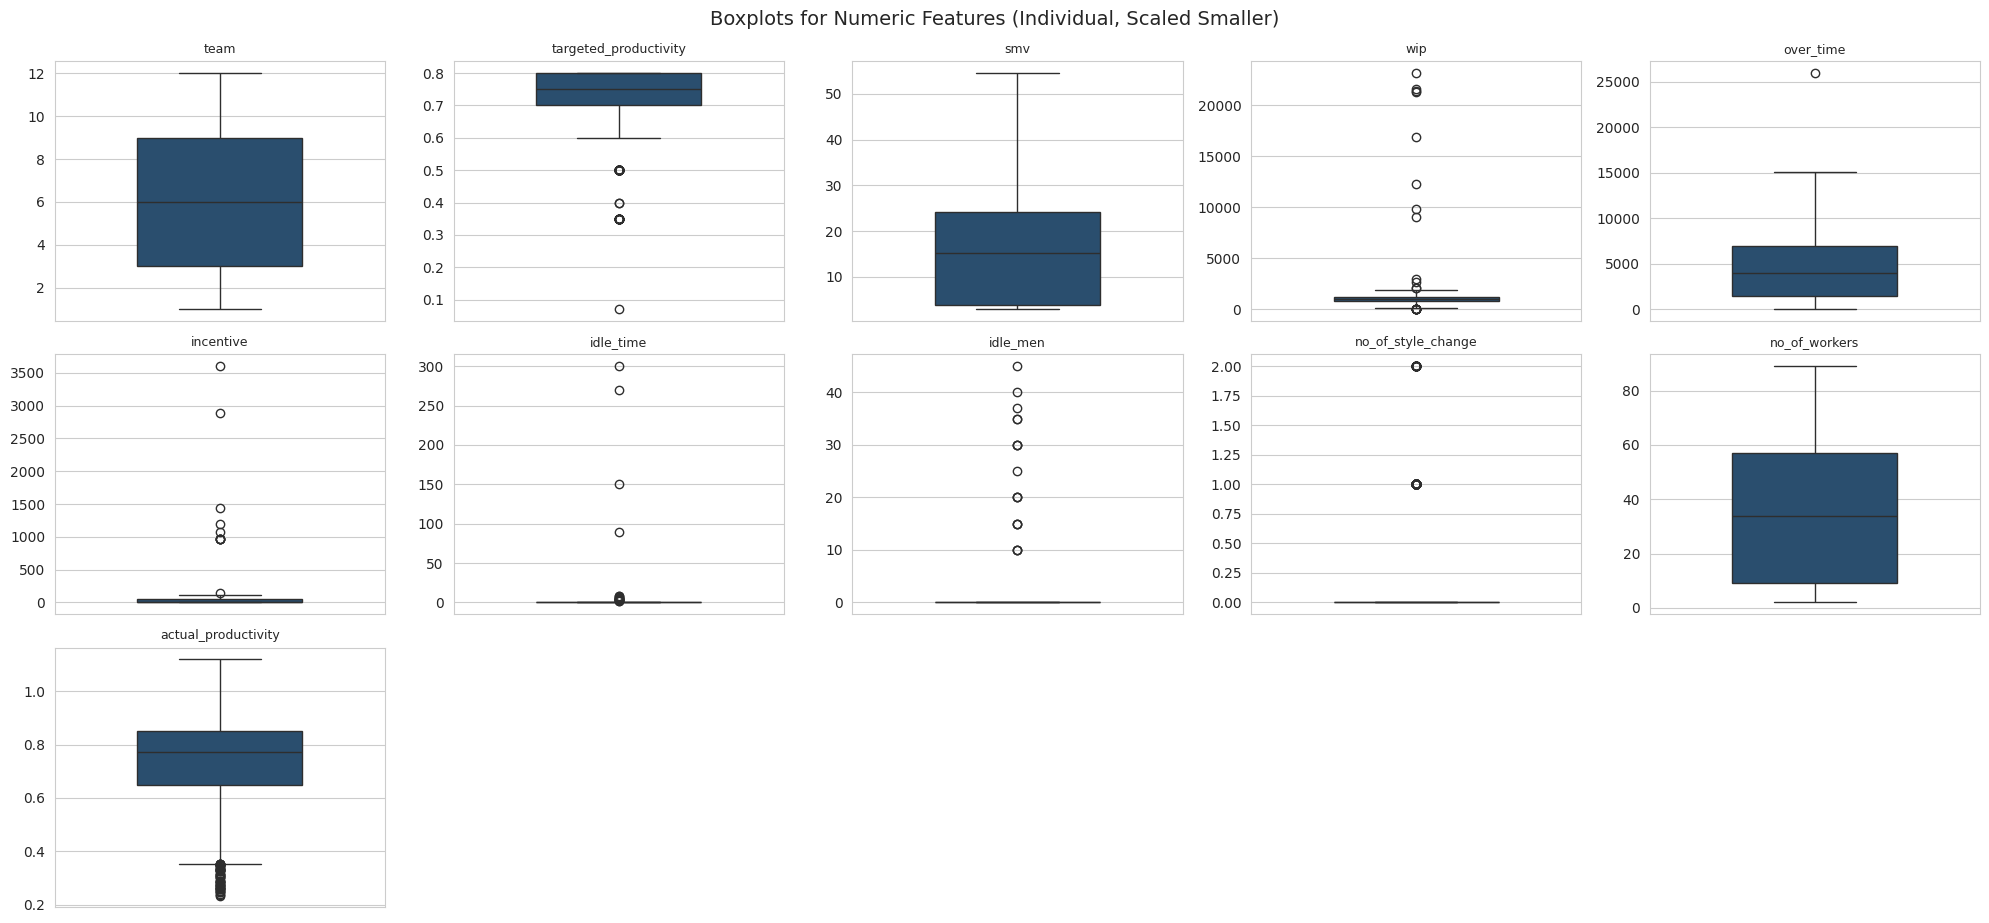

In [16]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Layout settings
cols_per_row = 5  # number of boxplots per row
rows = math.ceil(len(numeric_cols) / cols_per_row)

# Set up figure
plt.figure(figsize=(4 * cols_per_row, 3 * rows))
sns.set_style('whitegrid')

# Loop through each numeric feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(y=df[col], color='#1f4e79', width=0.5)  # darker blue
    plt.title(col, fontsize=9)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle('Boxplots for Numeric Features (Individual, Scaled Smaller)', fontsize=14, y=1.02)
plt.show()

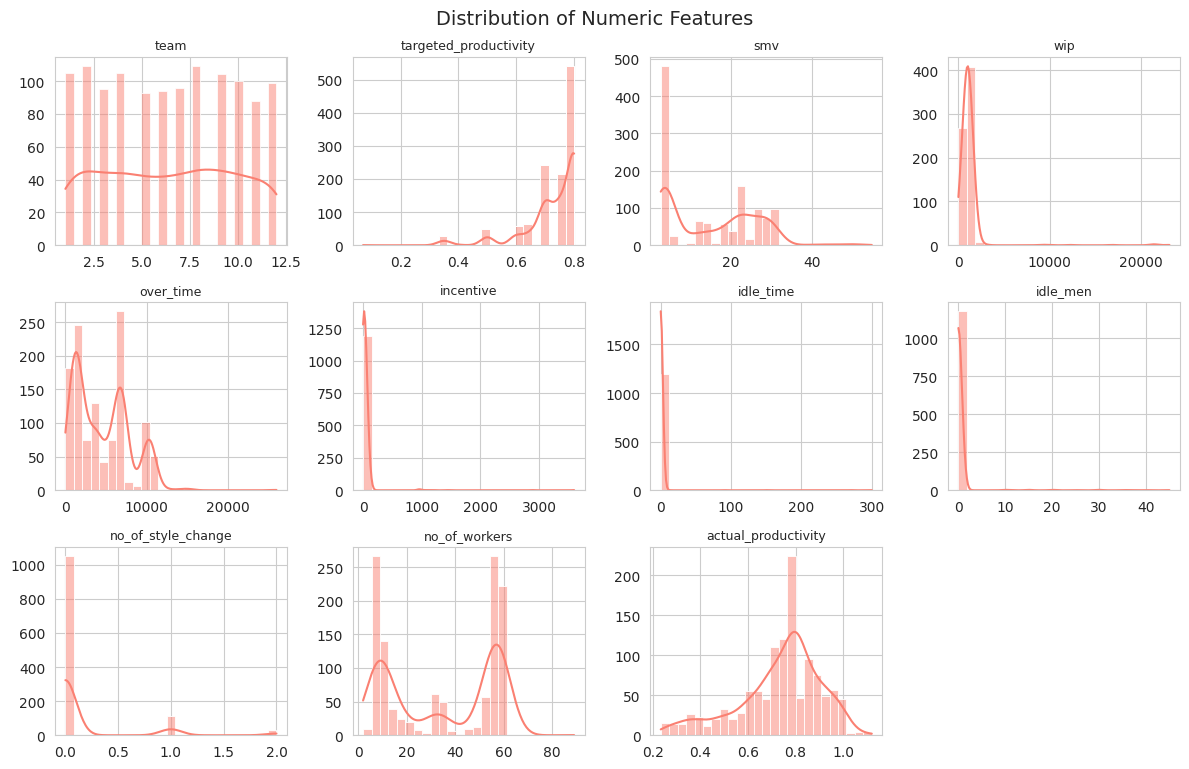

In [17]:
plots_per_row = 4        # how many histograms per row
rows = 3                 # total number of rows
total_plots = len(numeric_cols)
sns.set_style('whitegrid')

plt.figure(figsize=(plots_per_row * 3, rows * 2.5))  # to make them compact and horizontal

for i, col in enumerate(numeric_cols[:plots_per_row * rows], 1):
    plt.subplot(rows, plots_per_row, i)
    sns.histplot(Preprocessed_dataset[col], kde=True, color='salmon', bins=25)
    plt.title(f'{col}', fontsize=9)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle('Distribution of Numeric Features', fontsize=14, y=1.02)
plt.show()


wip    506
dtype: int64


/tmp/ipython-input-956449322.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette='viridis')


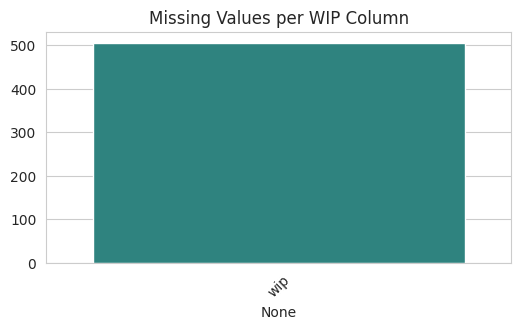

In [19]:
#Visualizing this with a bar chart
missing = Preprocessed_dataset.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

plt.figure(figsize=(6,3))
sns.barplot(x=missing.index, y=missing.values, palette='viridis')
plt.title('Missing Values per WIP Column')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-140241912.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Missing Count', data=missing_by_dept, palette='Blues_r')


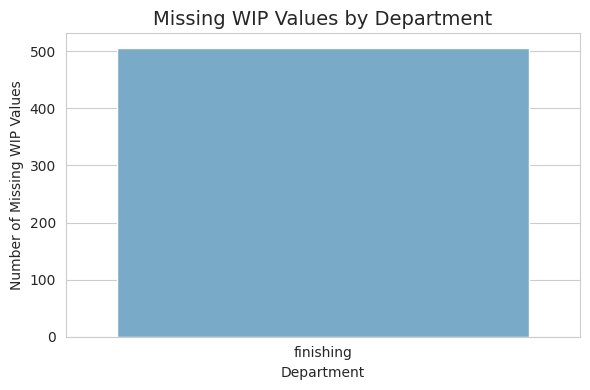

In [20]:
# Filter rows where WIP is missing
missing_wip = Preprocessed_dataset[Preprocessed_dataset['wip'].isnull()]

# Count missing WIP by department
missing_by_dept = missing_wip['department'].value_counts().reset_index()
missing_by_dept.columns = ['Department', 'Missing Count']

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='Department', y='Missing Count', data=missing_by_dept, palette='Blues_r')
plt.title('Missing WIP Values by Department', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Number of Missing WIP Values')
plt.tight_layout()
plt.show()

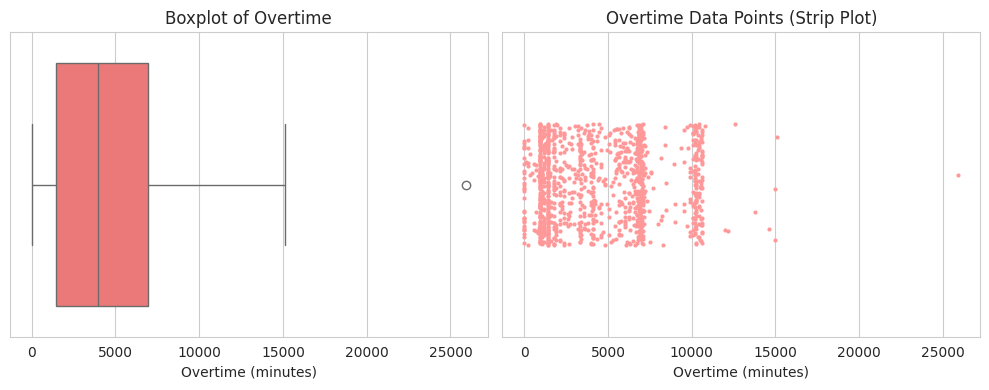

In [21]:
plt.figure(figsize=(10,4))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=Preprocessed_dataset['over_time'], color='#ff6666')
plt.title('Boxplot of Overtime')
plt.xlabel('Overtime (minutes)')

# Strip Plot
plt.subplot(1,2,2)
sns.stripplot(x=Preprocessed_dataset['over_time'], color='#ff9999', jitter=0.2, size=3)
plt.title('Overtime Data Points (Strip Plot)')
plt.xlabel('Overtime (minutes)')

plt.tight_layout()
plt.show()

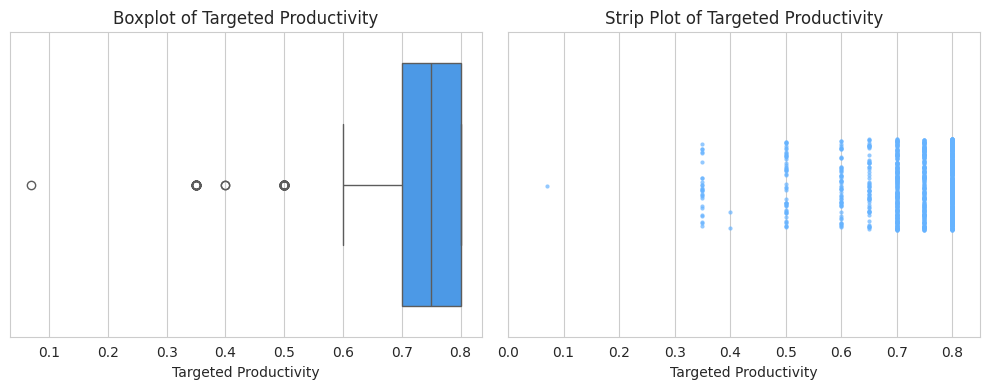

In [22]:
plt.figure(figsize=(10,4))

# Boxplot (left)
plt.subplot(1,2,1)
sns.boxplot(x=Preprocessed_dataset['targeted_productivity'], color='#3399ff')
plt.title('Boxplot of Targeted Productivity')
plt.xlabel('Targeted Productivity')

# Strip Plot (right)
plt.subplot(1,2,2)
sns.stripplot(x=Preprocessed_dataset['targeted_productivity'], color='#66b3ff', size=3, jitter=0.15, alpha=0.7)
plt.title('Strip Plot of Targeted Productivity')
plt.xlabel('Targeted Productivity')
plt.xlim(0, 0.85)  # keeps focus on full range without squeezing



plt.tight_layout()
plt.show()

/tmp/ipython-input-125054254.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


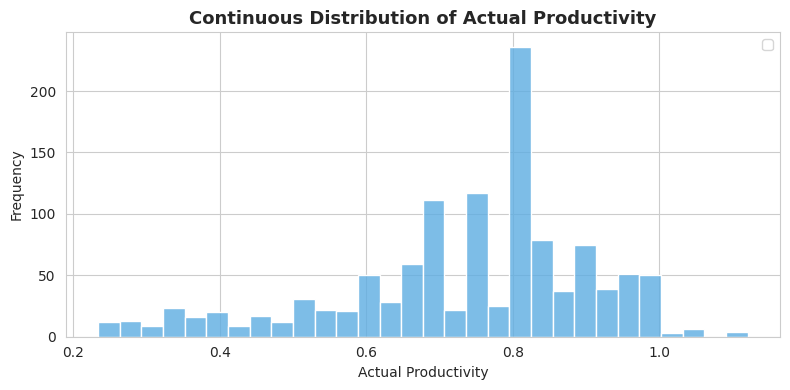

In [23]:
plt.figure(figsize=(8,4))

# Histogram plot
sns.histplot(Preprocessed_dataset['actual_productivity'], bins=30, color='#5dade2', alpha=0.8)

# Titles and labels
plt.title('Continuous Distribution of Actual Productivity', fontsize=13, fontweight='bold')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()



/tmp/ipython-input-1684092724.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranges.index, y=ranges.values, palette='Blues_r')


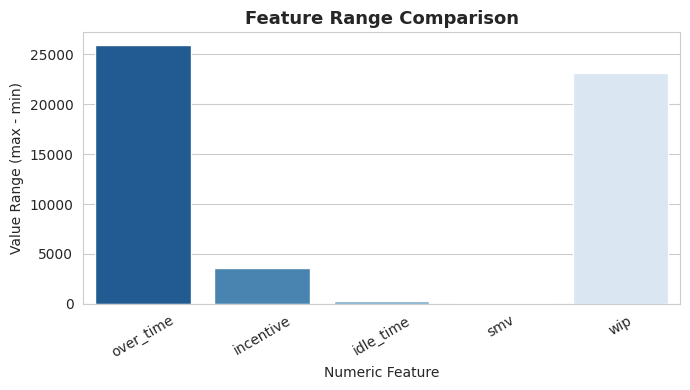

In [24]:
# Select numeric columns relevant for K-Means
numeric_cols = ['over_time', 'incentive', 'idle_time', 'smv', 'wip']

# Compute ranges (max - min)
ranges = Preprocessed_dataset[numeric_cols].max() - Preprocessed_dataset[numeric_cols].min()

# Plot
plt.figure(figsize=(7,4))
sns.barplot(x=ranges.index, y=ranges.values, palette='Blues_r')
plt.title('Feature Range Comparison', fontsize=13, fontweight='bold')
plt.xlabel('Numeric Feature')
plt.ylabel('Value Range (max - min)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#**[5] Data Mining Technique**
describe the classification and clustering techniques

###**Classification**
phase 3 code starts here

###**Clustering**
phase 3 code starts here

In [ ]:
from sklearn.cluster import KMeans

# Run K-Means (example with 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_result = kmeans.fit(normalized_data)

# Print results
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)

print("\nCluster Labels:")
print(kmeans_result.labels_)


#**[6] Evaluation Technique**

#**[7] Findings and Discussion**

#**[8] References**